### Prediciting today's stress levels


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import skew, normaltest
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("C:/Users/s4031/OneDrive/Desktop/Study materials/Semester 4/Project/realistic_demo_10k_rounded.csv")

In [3]:
df.head()

,Date,stress_level,energy_level,sleep_hours,hrv_ms,steps,aqi,pm25,pm10,temperature_celsius,humidity,uv_index,nutrition_item_count,body_survey_avg_severity,body_survey_condition_count,journal_sentiment
0,01/01/2024,7,3.0,6.3,48.3,2586.0,73.0,76.6,181.7,22.6,75.0,2.0,10.0,NaN,4.0,-1.0
1,02/01/2024,4,7.0,8.1,60.0,8242.7,141.0,27.1,75.2,19.9,83.3,10.0,NaN,1.1,2.0,0.2
2,03/01/2024,8,3.0,4.9,49.8,2000.0,73.0,NaN,15.5,12.6,51.9,5.0,17.0,3.2,4.0,0.0
3,04/01/2024,5,6.0,6.7,57.6,5851.3,126.0,79.8,136.0,18.3,59.2,6.0,9.0,0.1,3.0,0.4
4,05/01/2024,7,5.0,6.9,56.8,5627.8,138.0,64.8,75.5,21.8,40.2,10.0,16.0,4.4,4.0,0.2


In [4]:
#Check for missing values in each column
df.isnull().sum()

Date                              0
stress_level                      0
energy_level                      0
sleep_hours                       0
hrv_ms                            0
steps                             0
aqi                             981
pm25                            773
pm10                            838
temperature_celsius               0
humidity                          0
uv_index                        506
nutrition_item_count            664
body_survey_avg_severity       1078
body_survey_condition_count       0
journal_sentiment              1190
dtype: int64

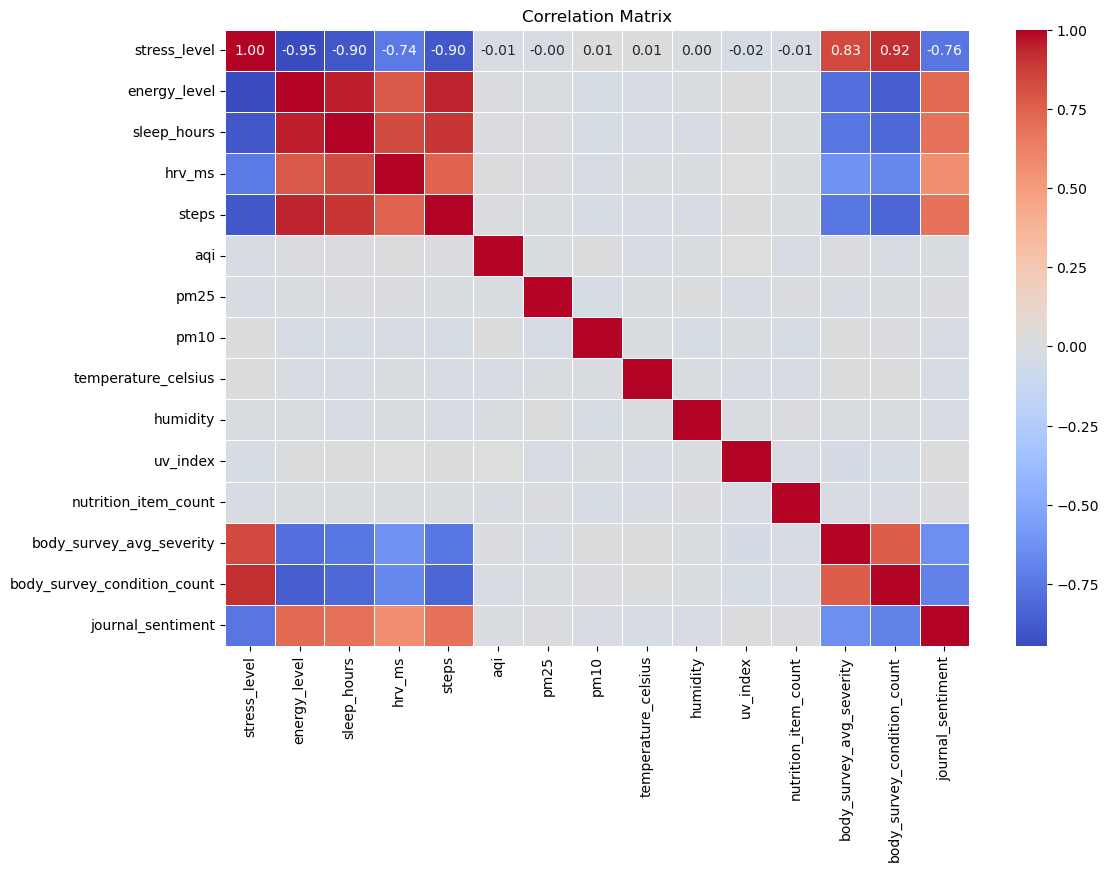

In [5]:
# Exclude non-numeric column for correlation (Date)
df_corr = df.drop(columns=['Date'])

# 1. Compute Correlation Matrix
corr_matrix = df_corr.corr()

# 2. Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         10000 non-null  object 
 1   stress_level                 10000 non-null  int64  
 2   energy_level                 10000 non-null  float64
 3   sleep_hours                  10000 non-null  float64
 4   hrv_ms                       10000 non-null  float64
 5   steps                        10000 non-null  float64
 6   aqi                          9019 non-null   float64
 7   pm25                         9227 non-null   float64
 8   pm10                         9162 non-null   float64
 9   temperature_celsius          10000 non-null  float64
 10  humidity                     10000 non-null  float64
 11  uv_index                     9494 non-null   float64
 12  nutrition_item_count         9336 non-null   float64
 13  body_survey_avg_s

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


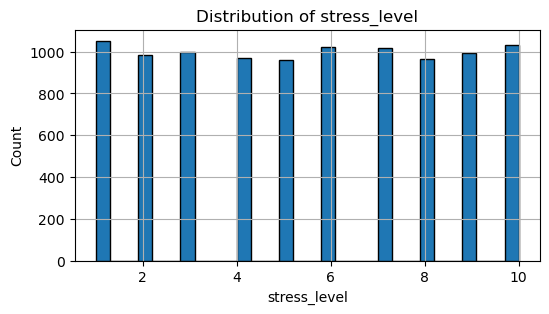

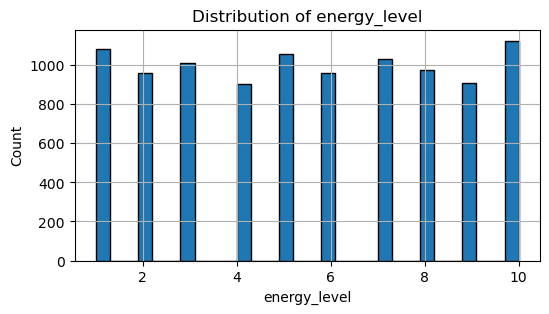

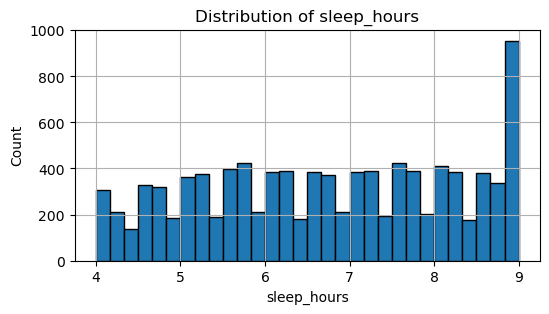

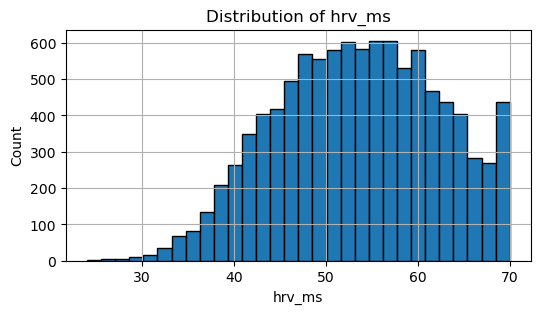

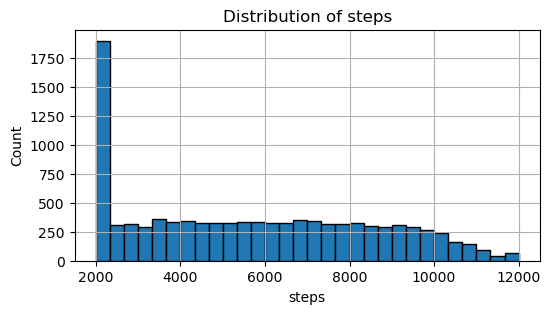

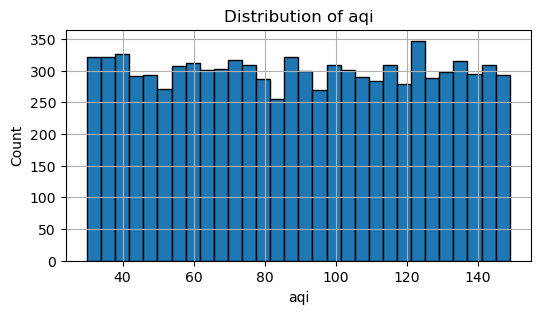

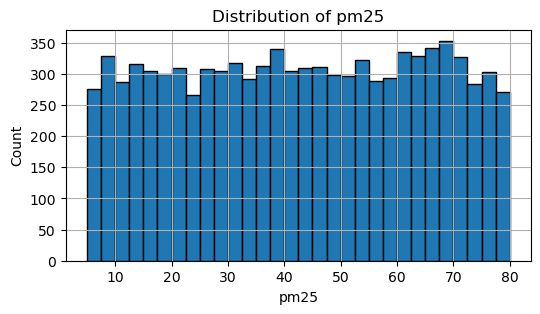

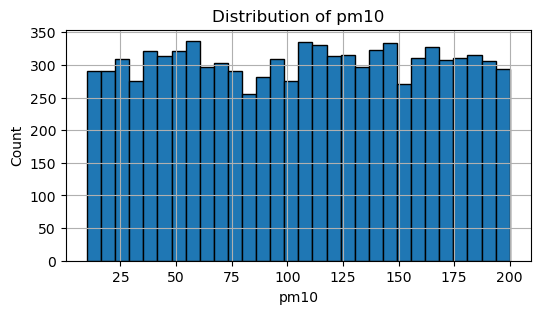

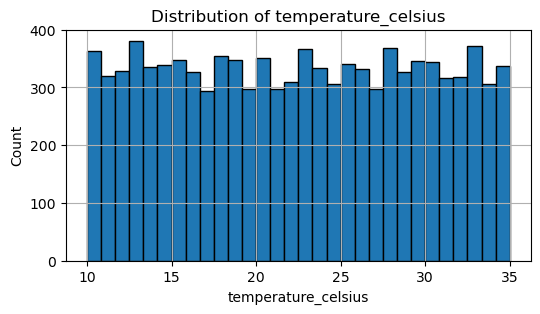

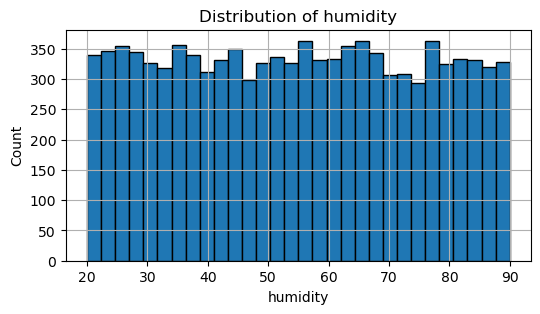

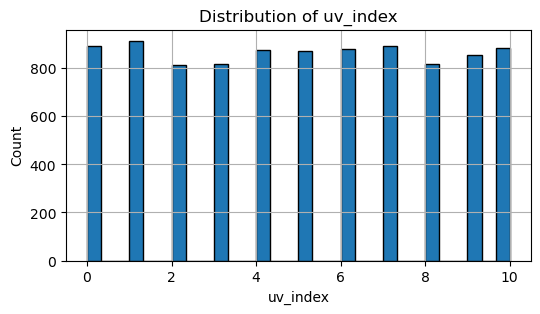

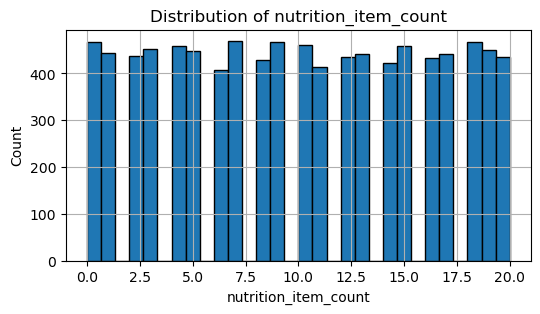

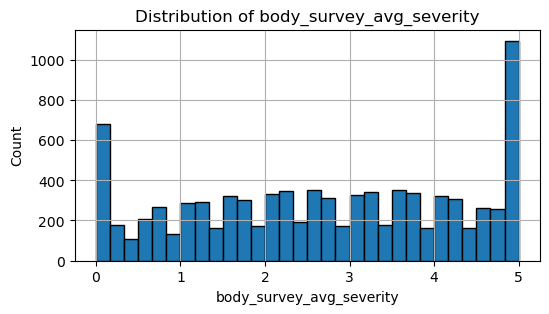

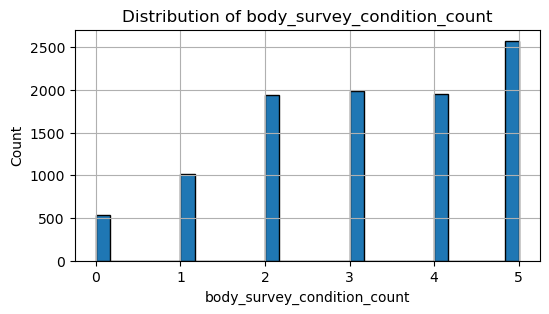

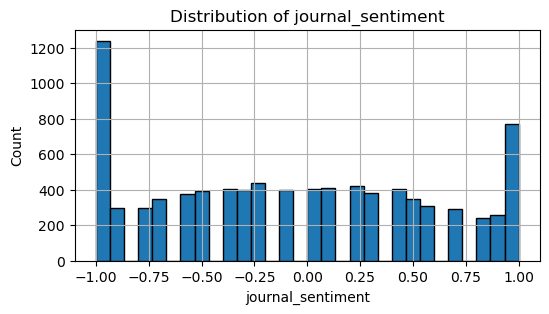

In [8]:
# Plot histograms for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=30, edgecolor='k')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [9]:
# Summary of missing values
missing_summary = df.isnull().sum().to_frame(name='Missing Values')
missing_summary['% Missing'] = (missing_summary['Missing Values'] / len(df)) * 100
print(missing_summary.sort_values(by='% Missing', ascending=False))


                             Missing Values  % Missing
journal_sentiment                      1190      11.90
body_survey_avg_severity               1078      10.78
aqi                                     981       9.81
pm10                                    838       8.38
pm25                                    773       7.73
nutrition_item_count                    664       6.64
uv_index                                506       5.06
Date                                      0       0.00
stress_level                              0       0.00
energy_level                              0       0.00
sleep_hours                               0       0.00
hrv_ms                                    0       0.00
steps                                     0       0.00
temperature_celsius                       0       0.00
humidity                                  0       0.00
body_survey_condition_count               0       0.00


C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


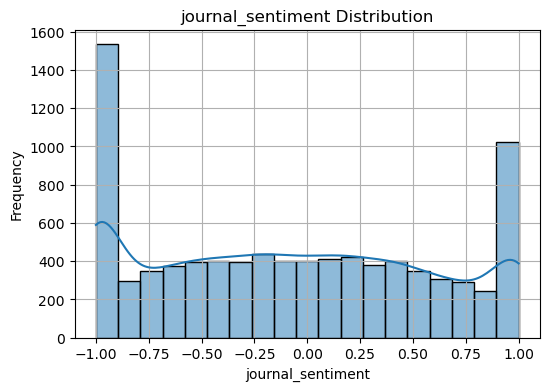

journal_sentiment: Skewness = 0.11 | D’Agostino p-value = 0.0000 -> Not Normal


C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


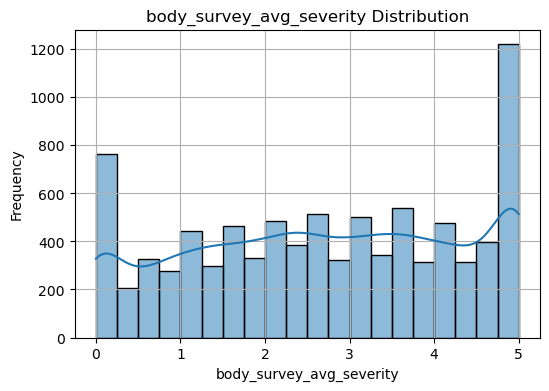

body_survey_avg_severity: Skewness = -0.12 | D’Agostino p-value = 0.0000 -> Not Normal


C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


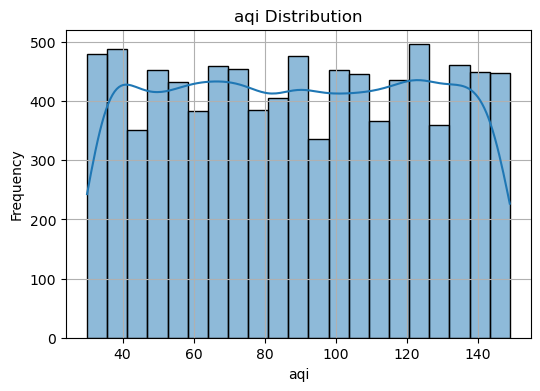

aqi: Skewness = 0.00 | D’Agostino p-value = 0.0000 -> Not Normal


C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


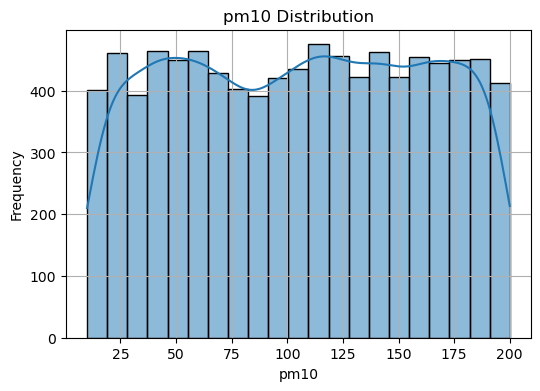

pm10: Skewness = -0.02 | D’Agostino p-value = 0.0000 -> Not Normal


C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


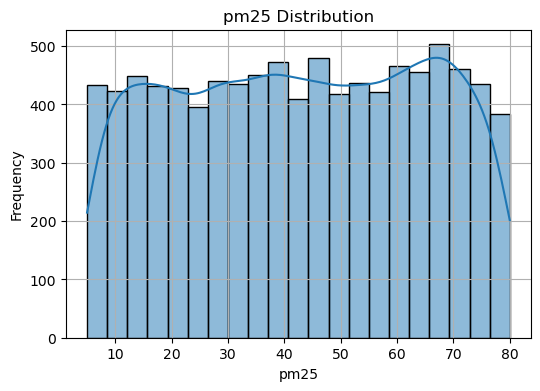

pm25: Skewness = -0.03 | D’Agostino p-value = 0.0000 -> Not Normal


C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


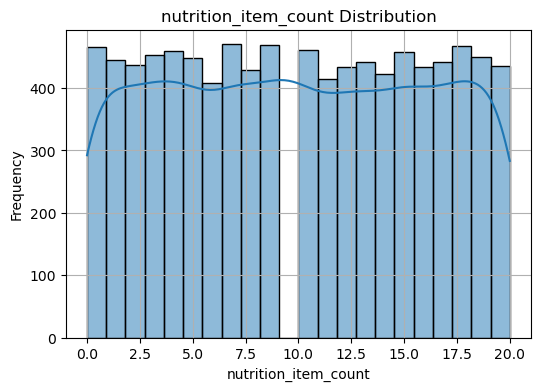

nutrition_item_count: Skewness = 0.01 | D’Agostino p-value = 0.0000 -> Not Normal


C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


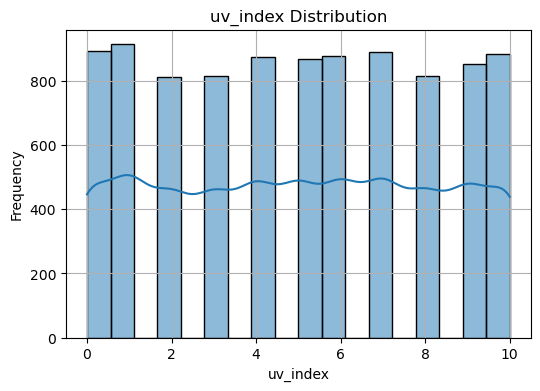

uv_index: Skewness = -0.00 | D’Agostino p-value = 0.0000 -> Not Normal


In [10]:
cols_with_missing = [
    "journal_sentiment", "body_survey_avg_severity", "aqi",
    "pm10", "pm25", "nutrition_item_count", "uv_index"
]

# Visualize & compute skewness + D’Agostino normality test
for col in cols_with_missing:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    
    sk = skew(df[col].dropna())
    stat, p = normaltest(df[col].dropna())
    
    print(f"{col}: Skewness = {sk:.2f} | D’Agostino p-value = {p:.4f} -> {'Not Normal' if p < 0.05 else 'Possibly Normal'}")

In [11]:
# Columns that will be median-imputed (flat or uniform distribution, low correlation)
median_impute_cols = ['aqi', 'pm25', 'pm10', 'uv_index', 'nutrition_item_count']

# Create the imputer
median_imputer = SimpleImputer(strategy='median')

# Apply imputation
df[median_impute_cols] = median_imputer.fit_transform(df[median_impute_cols])

In [12]:
df.isna().sum()

Date                              0
stress_level                      0
energy_level                      0
sleep_hours                       0
hrv_ms                            0
steps                             0
aqi                               0
pm25                              0
pm10                              0
temperature_celsius               0
humidity                          0
uv_index                          0
nutrition_item_count              0
body_survey_avg_severity       1078
body_survey_condition_count       0
journal_sentiment              1190
dtype: int64

C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


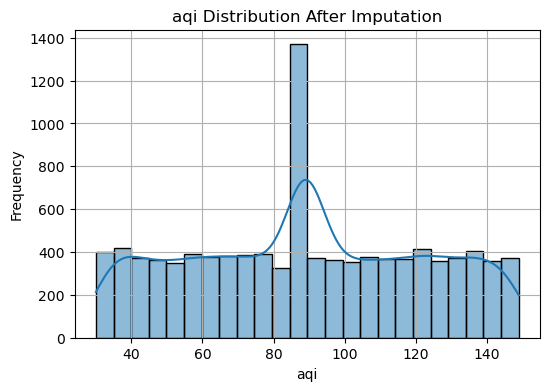

C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


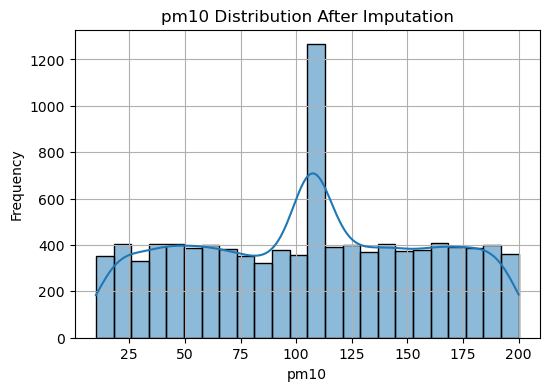

C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


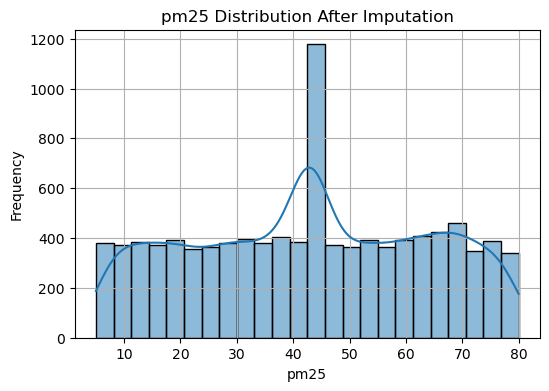

C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


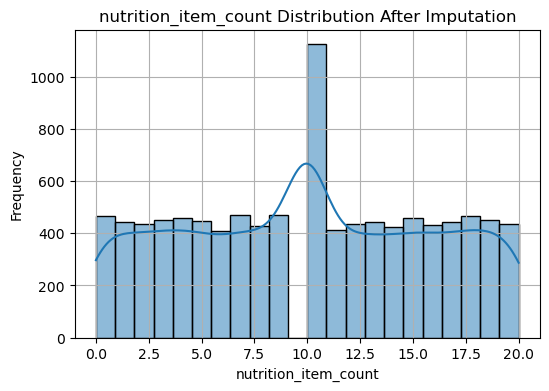

C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


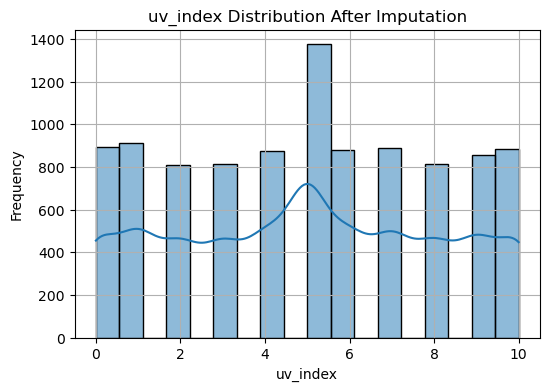

In [13]:
# Columns you imputed earlier
cols_with_missing = [ "aqi", "pm10", "pm25", "nutrition_item_count", "uv_index"
]

# Plot distributions after imputation
for col in cols_with_missing:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution After Imputation")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [14]:
# Columns that need KNN imputation
#knn_cols = ['journal_sentiment', 'body_survey_avg_severity']

#  Standardize only the columns needed for KNN
#scaler_knn = StandardScaler()
#df_knn_scaled = pd.DataFrame(scaler_knn.fit_transform(df[knn_cols]), columns=knn_cols)

In [15]:
#  Apply KNN imputation (k=5 )
#knn_imputer = KNNImputer(n_neighbors=5)
#df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn_scaled), columns=knn_cols)

In [16]:
# Inverse transform back to original scale
#df[knn_cols] = pd.DataFrame(scaler_knn.inverse_transform(df_knn_imputed), columns=knn_cols)

C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


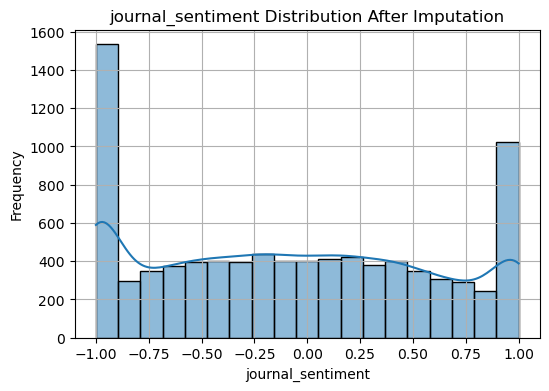

C:\Users\s4031\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


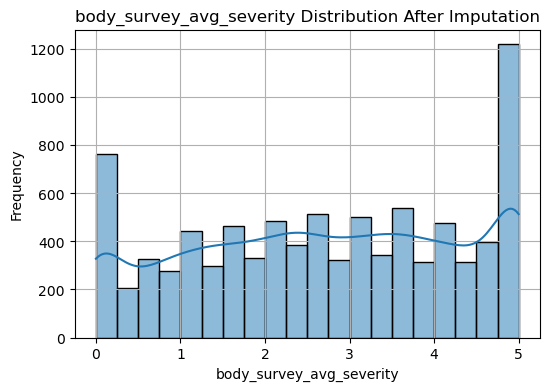

In [17]:
# Columns you imputed earlier
cols_with_missing = [
    "journal_sentiment", "body_survey_avg_severity"
]

# Plot distributions after imputation
for col in cols_with_missing:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution After Imputation")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [18]:
# Drop 'Date' for clustering
df_numeric = df.drop(columns=['Date'])

# Step 1: Temporary mean imputation to allow clustering
temp_imputer = SimpleImputer(strategy='mean')
temp_filled = temp_imputer.fit_transform(df_numeric)

In [19]:
# Step 2: Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(temp_filled)
df_numeric['Cluster'] = clusters

In [20]:
# Step 3: Impute missing values using cluster-specific means
def cluster_mean_impute(df_with_clusters):
    df_imputed = df_with_clusters.copy()
    for cluster in df_with_clusters['Cluster'].unique():
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
        for column in cluster_data.columns:
            if column == 'Cluster':
                continue
            mean_val = cluster_data[column].mean(skipna=True)
            mask = (df_with_clusters['Cluster'] == cluster) & (df_with_clusters[column].isnull())
            df_imputed.loc[mask, column] = mean_val
    return df_imputed

# Apply imputation
df_imputed = cluster_mean_impute(df_numeric)

# Drop 'Cluster' column and reattach 'Date'
df_imputed = df_imputed.drop(columns=['Cluster'])
df_imputed['Date'] = df['Date']

# Overwrite df for downstream use
df = df_imputed.copy()

C:\Users\s4031\AppData\Local\Temp\ipykernel_40564\1894620381.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.315640298892038' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_imputed.loc[mask, column] = mean_val


In [21]:
df.isna().sum()

stress_level                   0
energy_level                   0
sleep_hours                    0
hrv_ms                         0
steps                          0
aqi                            0
pm25                           0
pm10                           0
temperature_celsius            0
humidity                       0
uv_index                       0
nutrition_item_count           0
body_survey_avg_severity       0
body_survey_condition_count    0
journal_sentiment              0
Date                           0
dtype: int64

In [22]:
df.head()

,stress_level,energy_level,sleep_hours,hrv_ms,steps,aqi,pm25,pm10,temperature_celsius,humidity,uv_index,nutrition_item_count,body_survey_avg_severity,body_survey_condition_count,journal_sentiment,Date
0,7.0,3.0,6.3,48.3,2586.0,73.0,76.6,181.7,22.6,75.0,2.0,10.0,3.972196,4.0,-1.0,2024-01-01
1,4.0,7.0,8.1,60.0,8242.7,141.0,27.1,75.2,19.9,83.3,10.0,10.0,1.100000,2.0,0.2,2024-01-02
2,8.0,3.0,4.9,49.8,2000.0,73.0,42.9,15.5,12.6,51.9,5.0,17.0,3.200000,4.0,0.0,2024-01-03
3,5.0,6.0,6.7,57.6,5851.3,126.0,79.8,136.0,18.3,59.2,6.0,9.0,0.100000,3.0,0.4,2024-01-04
4,7.0,5.0,6.9,56.8,5627.8,138.0,64.8,75.5,21.8,40.2,10.0,16.0,4.400000,4.0,0.2,2024-01-05


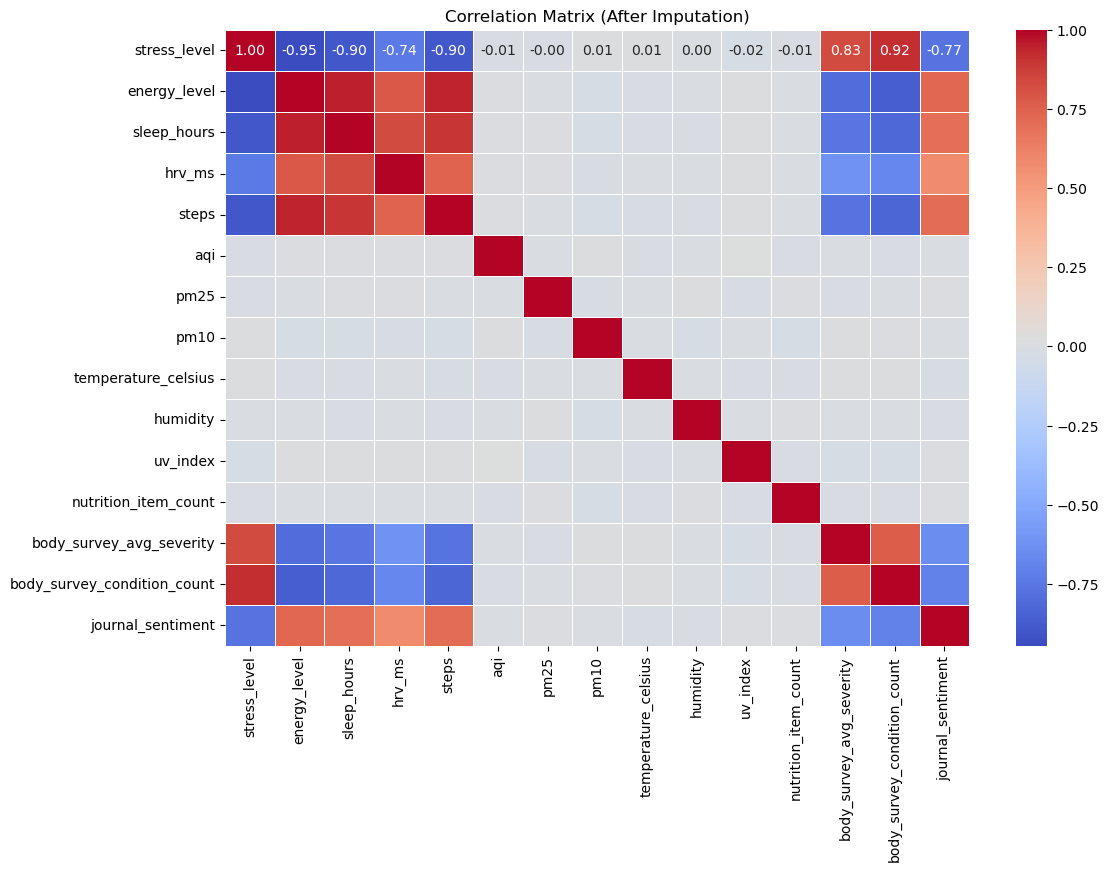

In [23]:
corr_matrix = df.drop(columns=['Date']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (After Imputation)")
plt.show()


In [24]:
# test for multi collinearity
# Drop 'Date' and the target column for VIF calculation
X_for_vif = df.drop(columns=['Date', 'stress_level'])

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

# Sort and display
print(vif_data.sort_values(by='VIF', ascending=False))

                        Feature         VIF
1                   sleep_hours  217.287658
2                        hrv_ms  110.978689
0                  energy_level   97.382304
3                         steps   47.486657
12  body_survey_condition_count   19.241903
11     body_survey_avg_severity   11.382849
7           temperature_celsius   10.110160
8                      humidity    8.010458
4                           aqi    8.004490
5                          pm25    5.177966
6                          pm10    4.940116
10         nutrition_item_count    3.819686
9                      uv_index    3.554085
13            journal_sentiment    2.298488



📊 XGBoost HRV Prediction Metrics:
R²: 0.6824
RMSE: 4.97
MAE: 4.01


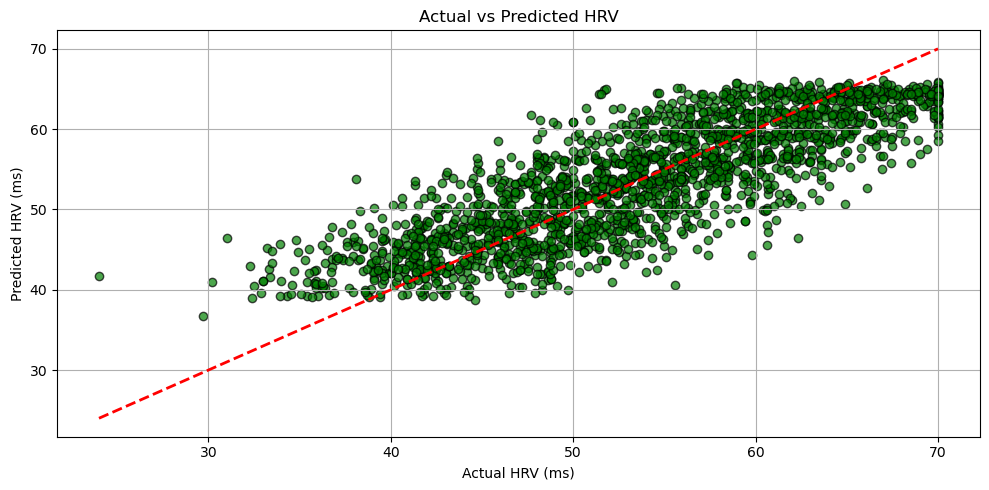


🔮 Predicted HRV for Today: 53.78


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# ✅ 1. Prepare the data
df_prepped = df.copy()
df_prepped['Date'] = pd.to_datetime(df_prepped['Date'], errors='coerce')
df_prepped = df_prepped.dropna(subset=['Date'])

# Select features and target
features = [
    'journal_sentiment',
    'body_survey_avg_severity',
    'energy_level',
    'sleep_hours',
    'stress_level',
    'steps',
    'nutrition_item_count'
]
target = 'hrv_ms'

X = df_prepped[features]
y = df_prepped[target]

# ✅ 2. Train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 3. Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# ✅ 4. Predict HRV for test set
y_pred = model.predict(X_test)

# ✅ 5. Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 XGBoost HRV Prediction Metrics:")
print("R²:", round(r2, 4))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))

# ✅ 6. Plot Actual vs Predicted HRV
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual HRV (ms)')
plt.ylabel('Predicted HRV (ms)')
plt.title('Actual vs Predicted HRV')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ 7. Predict HRV for **today** (latest row)
latest_row = df_prepped[features].iloc[[-1]]
today_predicted_hrv = model.predict(latest_row)[0]
print("\n🔮 Predicted HRV for Today:", round(today_predicted_hrv, 2))


In [26]:
# ✅ Step 1: Define your custom feature values for HRV prediction
custom_input = {
    'journal_sentiment': -1,
    'body_survey_avg_severity': 0,
    'energy_level': 3,
    'sleep_hours': 6.3,
    'stress_level': 7,
    'steps': 2586,
    'nutrition_item_count': 10
}

# ✅ Step 2: Convert to DataFrame
import pandas as pd
custom_df = pd.DataFrame([custom_input])

# ✅ Step 3: Predict HRV using the trained XGBoost model
# (assuming your model is named 'model' from previous training)
predicted_hrv = model.predict(custom_df)[0]

# ✅ Step 4: Show the result
print(f"\n🔮 Predicted HRV based on custom input: {predicted_hrv:.2f} ms")



🔮 Predicted HRV based on custom input: 58.12 ms


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ✅ 1. Load and prepare data
#df = pd.read_csv("C:/Users/sanja/OneDrive/Inflamed/realistic_demo_10k_rounded.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date']).sort_values('Date')

features = [
    'journal_sentiment',
    'body_survey_avg_severity',
    'energy_level',
    'sleep_hours',
    'stress_level',
    'steps',
    'nutrition_item_count'
]
target = 'hrv_ms'

X = df[features]
y = df[target]

# ✅ 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ✅ 3. Initialize models
models = {
    'Lasso': Lasso(alpha=0.01, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42),
    'SVR': SVR(C=100, gamma=0.1, epsilon=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# ✅ 4. Train and predict for each model
results_df = pd.DataFrame({'Actual HRV': y_test.reset_index(drop=True)})

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Add predictions to the results dataframe
    results_df[f'Predicted HRV ({name})'] = y_pred
    
    # Evaluate and print metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n📊 {name} Metrics:")
    print("R²:", round(r2, 4))
    print("RMSE:", round(rmse, 2))

# ✅ 5. Display comparison table
print("\n📝 Actual vs Predicted HRV for Each Model:")
print(results_df.head(10))  # Show first 10 rows for easy comparison



📊 Lasso Metrics:
R²: 0.686
RMSE: 5.0

📊 XGBoost Metrics:
R²: 0.6789
RMSE: 5.06

📊 SVR Metrics:
R²: 0.3725
RMSE: 7.07

📊 RandomForest Metrics:
R²: 0.655
RMSE: 5.24

📝 Actual vs Predicted HRV for Each Model:
   Actual HRV  Predicted HRV (Lasso)  Predicted HRV (XGBoost)  \
0        44.5              48.355999                48.464977   
1        63.9              58.683066                58.662670   
2        64.9              55.804286                56.533104   
3        52.8              57.830017                57.145756   
4        53.8              52.882607                53.174911   
5        49.6              49.878645                50.840836   
6        68.4              64.581610                65.176903   
7        50.8              44.914212                45.150166   
8        62.6              63.158264                63.754356   
9        50.8              48.935802                48.749638   

   Predicted HRV (SVR)  Predicted HRV (RandomForest)  
0            53.174665

In [28]:
# ✅ Step 1: Define your custom feature input
custom_input = {
    'journal_sentiment': 0,
    'body_survey_avg_severity': 3.2,
    'energy_level': 3,
    'sleep_hours': 4.9,
    'stress_level': 8,
    'steps': 2000,
    'nutrition_item_count': 17
}

# ✅ Step 2: Convert to DataFrame (1 row)
import pandas as pd
custom_df = pd.DataFrame([custom_input])

# ✅ Step 3: Predict HRV using the trained Lasso model
# (assuming your trained Lasso model is named 'lasso_model' or 'models["Lasso"]')
predicted_hrv = models['Lasso'].predict(custom_df)[0]

# ✅ Step 4: Show result
print(f"\n🔮 Predicted HRV (Lasso) for custom input: {predicted_hrv:.2f} ms")


🔮 Predicted HRV (Lasso) for custom input: 44.52 ms


In [29]:
# ✅ Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# ✅ Step 2: Load and prepare your data
#df = pd.read_csv("C:/Users/sanja/OneDrive/Inflamed/realistic_demo_10k_rounded.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date']).sort_values('Date')

# ✅ Step 3: Select features and target
features = [
    'journal_sentiment',
    'body_survey_avg_severity',
    'energy_level',
    'sleep_hours',
    'stress_level',
    'steps',
    'nutrition_item_count'
]
target = 'hrv_ms'

X = df[features]
y = df[target]

# ✅ Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# ✅ Step 5: Initialize and train Linear Regression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# ✅ Step 6: Predict on test set
y_pred_linreg = linreg_model.predict(X_test)

# ✅ Step 7: Evaluate the model
r2 = r2_score(y_test, y_pred_linreg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linreg))
mae = mean_absolute_error(y_test, y_pred_linreg)

print("\n📊 Linear Regression Metrics:")
print("R²:", round(r2, 4))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))

# ✅ Step 8: Predict HRV for custom input
custom_input = {
    'journal_sentiment': 0.2,
    'body_survey_avg_severity': 1.1,
    'energy_level': 7,
    'sleep_hours': 8.1,
    'stress_level': 8,
    'steps': 8242.7,
    'nutrition_item_count': 0
}
custom_df = pd.DataFrame([custom_input])
predicted_hrv_linreg = linreg_model.predict(custom_df)[0]

print(f"\n🔮 Predicted HRV (Linear Regression) for custom input: {predicted_hrv_linreg:.2f} ms")



📊 Linear Regression Metrics:
R²: 0.6884
RMSE: 4.99
MAE: 4.02

🔮 Predicted HRV (Linear Regression) for custom input: 60.66 ms


In [30]:
import pickle

with open('linreg_model.pkl', 'wb') as f:
    pickle.dump(linreg_model, f)

print("Model saved as 'linreg_model.pkl'")

Model saved as 'linreg_model.pkl'
